<a href="https://colab.research.google.com/github/DebarajPurohit/Startup_profit_prediction/blob/main/startup_profit_prediction_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementing Multiple Linear Reegression

## To predict the the profit made by a start up on the basis of expenses incurred and the state where they operate

In [2]:
# importing libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
# Getting Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 4: MACHINE LEARNING/Linear Regression Implementation/Copy of 50_Startups.csv')

In [4]:
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.shape

(50, 5)

In [6]:
# Getting the columns name
columns_name = dataset.columns.tolist()

In [7]:
columns_name

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [8]:
# Checking the null values in each column
for column in columns_name:
  print(column,"=",dataset[dataset[column].isnull()].index.tolist())

R&D Spend = []
Administration = []
Marketing Spend = []
State = []
Profit = []


### There are no null values in the dataset

### Checking the linear dependencies of independent variable with dependent variables (Profit)

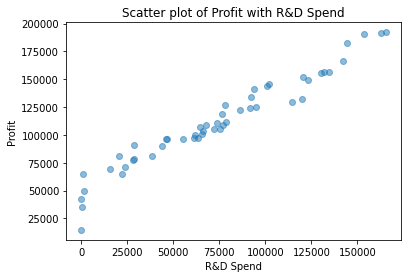

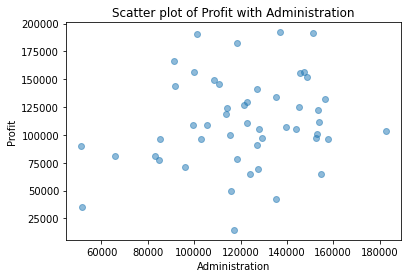

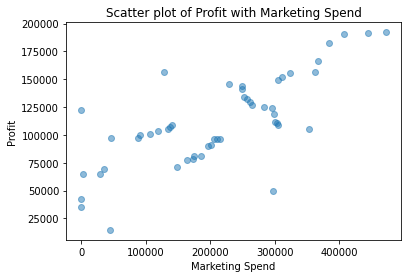

In [9]:
for column in columns_name[:3]:
  plt.scatter(dataset[column],dataset['Profit'], alpha= 0.5)
  plt.title('Scatter plot of Profit with '+ column)
  plt.xlabel(column)
  plt.ylabel('Profit')
  plt.show()

Text(0, 0.5, 'Profit')

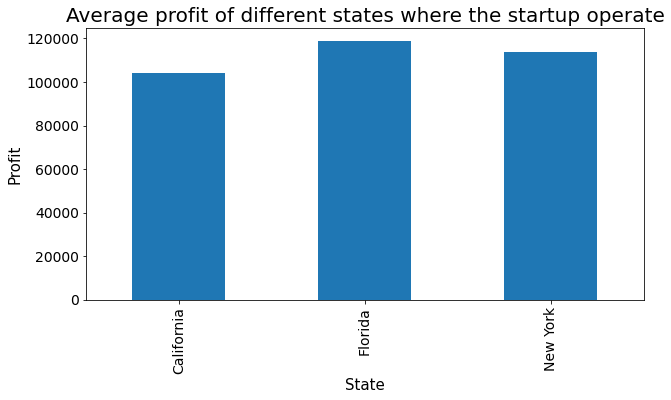

In [11]:
# Create a column chart to visualize the categorical value
ax = dataset.groupby(['State'])['Profit'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
#Set the title
ax.set_title("Average profit of different states where the startup operate", fontsize = 20)

#Set x and y-label
ax.set_xlabel("State", fontsize=15)
ax.set_ylabel("Profit", fontsize= 15)

In [12]:
dataset.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

## Since the data in state column is of categorical type, we have to convert it into numerical type for implementing it in machine learning model

In [13]:
dataset['IsNewYork_State']= np.where(dataset['State']=='New York',1,0)
dataset['IsCalifornia_State']= np.where(dataset['State']=='California',1,0)
dataset['IsFlorida_State']= np.where(dataset['State']=='Florida',1,0)

In [14]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,IsNewYork_State,IsCalifornia_State,IsFlorida_State
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [19]:
# Now the state column is of no use so let's drop it
dataset.drop(columns=['State'], axis=1, inplace = True)

In [20]:
# Defining the dependent variable
dependent_variable= 'Profit'

In [21]:
#Specifying the Independent Variable
independent_variable = list(set(dataset.columns.tolist())-{dependent_variable})

In [22]:
independent_variable

['IsFlorida_State',
 'R&D Spend',
 'Administration',
 'Marketing Spend',
 'IsNewYork_State',
 'IsCalifornia_State']

In [23]:
X = dataset[independent_variable].values

In [24]:
X

array([[0.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.2333488e+05,

In [25]:
y = dataset[dependent_variable].values

In [26]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [29]:
# Splitting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [32]:
X_train.shape

(40, 6)

In [34]:
X_test.shape

(10, 6)

In [35]:
# Transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Now we will fit multiple linear regression to the training dataset. In this step, It will find the intercept, the parameters of the model and also perform the gradient descent

In [37]:
# Fitting multiple linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
regressor.intercept_

44153.95466784863

In [39]:
regressor.coef_

array([-8.72645791e+02,  1.27892182e+05,  3.49927567e+03,  1.72720281e+04,
        7.86007422e+02,  8.66383692e+01])

In [43]:
# Getting y^ for X_train
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 95764.42320496,  89164.62849777, 109506.72329085,  91366.2188941 ,
       127111.48666646, 159019.04337114, 148905.9881254 ,  48179.60744028,
        45374.34722508, 102951.9596798 , 145449.63178399,  96684.71387299,
        97535.3576194 , 116571.15139254,  69421.13311312, 116212.62095133,
        60736.53267612, 152787.95464277, 127413.0337311 , 102210.16391827,
       161822.7226407 , 131583.61511491,  75019.09161337,  48054.91969394,
       189547.28196893, 127528.92248422,  85540.50570954, 111255.8251405 ,
       156191.10124356, 108464.25100331,  75306.81185049, 119915.38726755,
       115144.58914955, 152688.90677959,  81513.47163492,  57298.28613018,
       172852.28336637, 192919.57537462,  47007.62737751,  65835.99435878])

In [42]:
# Actual values of y_train
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [44]:
mean_squared_error(y_pred_train,y_train)

81571001.80077371

In [49]:
# RMSE
math.sqrt(mean_squared_error(y_pred_train,y_train))

9031.66661257897

In [48]:
r2_score(y_train,y_pred_train)

0.9501847627493607

In [45]:
y_pred_test = regressor.predict(X_test)
y_pred_test

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [46]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [47]:
mean_squared_error(y_pred_test,y_test)

83502864.03257723

In [50]:
math.sqrt(mean_squared_error(y_pred_test,y_test))

9137.990152794937

In [51]:
r2_score(y_test,y_pred_test)

0.9347068473282426